# Multiclass classification

In [1]:
from sklearn.datasets import make_classification
X,Y = make_classification(n_samples=6000, n_classes=3, n_features=30, n_informative=15, random_state=42)

In [2]:
X

array([[-1.44143883,  0.99759432,  0.64881894, ...,  0.26075709,
        -2.4917032 , -0.52457062],
       [-5.14274116,  2.44379509,  0.59681357, ..., -0.67343933,
         2.13880873, -1.34828698],
       [ 0.65562953, -1.84153079,  0.80405201, ..., -1.45272723,
        -3.46992694,  1.12992925],
       ...,
       [ 4.12653393, -4.34701772, -0.2590811 , ..., -0.28741425,
         7.28922344, -1.18100918],
       [-0.71009863,  3.94052935,  1.83897001, ...,  3.29290311,
         6.91505595,  0.80226731],
       [ 1.24909105,  3.92319056, -0.05696048, ..., -2.61261051,
        -3.21501144, -0.04845804]])

In [3]:
Y

array([2, 2, 0, ..., 1, 0, 2])

In [4]:
import numpy as np
np.unique(Y)

array([0, 1, 2])

In [5]:
cols = [f'x{i+1}' for i in range(30)]
cols

['x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30']

In [6]:
import pandas as pd
X = pd.DataFrame(X, columns=cols)
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,-1.441439,0.997594,0.648819,-0.939605,1.757397,0.578914,2.427303,-2.051151,2.229941,4.161986,...,-1.479880,-0.348015,-0.607153,-1.081817,-1.993413,1.533084,-1.496706,0.260757,-2.491703,-0.524571
1,-5.142741,2.443795,0.596814,-5.863056,1.387833,0.481951,4.083274,-0.973058,0.552966,2.620579,...,-0.743816,-0.382961,-0.274725,-0.832032,-1.148192,-0.926654,0.970663,-0.673439,2.138809,-1.348287
2,0.655630,-1.841531,0.804052,2.357834,-4.326275,-0.973050,-4.126278,-6.036214,-3.200378,1.758776,...,0.240042,-1.137683,-0.927894,0.697630,0.631764,0.240156,0.139782,-1.452727,-3.469927,1.129929
3,-1.598327,1.024581,0.237928,1.391549,-0.488321,-1.089719,-3.627360,0.757025,-0.750550,1.952786,...,1.769143,0.310551,1.196544,1.108069,0.824942,0.480005,1.255185,-1.671230,3.642342,-1.862065
4,-1.079465,-0.613138,-2.654921,1.533515,1.009928,-0.910633,-0.973801,-1.726216,-2.431381,1.305569,...,0.724812,1.708111,-0.302242,0.858970,0.878317,-0.369408,0.278626,-2.291166,-0.044003,0.627598


In [7]:
Y = pd.DataFrame(Y,columns=['y'])
Y.head()

,y
0,2
1,2
2,0
3,0
4,0


## One Hot encode target feature

In [8]:
# One Hot Encode Targe feature
from keras.utils import to_categorical
Y_cat = to_categorical(Y)

In [9]:
Y_cat

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

### Preprocessing pipeline

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

In [12]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[-0.52671961,  0.27230193,  0.65623137, ...,  0.23135323,
        -0.25895458, -0.52958856],
       [-1.93121764,  0.87478938,  0.6049309 , ..., -0.14098636,
         0.73357158, -1.35982943],
       [ 0.269035  , -0.91047798,  0.80936035, ..., -0.45158456,
        -0.46863176,  1.13801631],
       ...,
       [ 1.58610611, -1.95426419, -0.23936264, ...,  0.01287038,
         1.8375362 , -1.19122665],
       [-0.2492049 ,  1.49832908,  1.83025067, ...,  1.43986566,
         1.75733535,  0.80775901],
       [ 0.4942302 ,  1.49110574, -0.03998164, ..., -0.91387541,
        -0.41399194, -0.04970478]])

In [13]:
X_pre = pd.DataFrame(X_pre,columns=num_pipe.get_feature_names_out())
X_pre

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,-0.526720,0.272302,0.656231,-0.225921,0.751405,0.574286,1.249114,-0.570934,0.927751,1.673181,...,-1.489109,-0.340353,-0.625233,-1.075979,-0.827133,1.529565,-1.530454,0.231353,-0.258955,-0.529589
1,-1.931218,0.874789,0.604931,-2.081035,0.592913,0.476724,2.000062,-0.120260,0.223806,0.998535,...,-0.752340,-0.375454,-0.294869,-0.826403,-0.483039,-0.934985,0.957838,-0.140986,0.733572,-1.359829
2,0.269035,-0.910478,0.809360,1.016526,-1.857657,-0.987252,-1.722796,-2.236805,-1.351737,0.621340,...,0.232462,-1.133510,-0.943983,0.701980,0.241593,0.234107,0.119910,-0.451585,-0.468632,1.138016
3,-0.586253,0.283545,0.250910,0.652438,-0.211700,-1.104641,-1.496547,0.602964,-0.323371,0.706255,...,1.763030,0.321121,1.167266,1.112076,0.320237,0.474425,1.244772,-0.538672,1.055846,-1.877677
4,-0.389365,-0.398729,-2.602729,0.705930,0.430843,-0.924450,-0.293215,-0.435102,-1.028935,0.422980,...,0.717698,1.724856,-0.322215,0.863185,0.341966,-0.376649,0.259932,-0.785758,0.265697,0.631707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,-0.492894,0.401955,-0.272049,-1.514929,1.378480,-1.431636,0.900758,-0.055414,-0.555541,0.511672,...,-0.451408,-0.303729,0.548324,-1.119441,-0.204855,0.843833,-0.609540,-0.296115,-0.145897,0.134450
5996,-0.194481,0.179532,1.776192,0.394610,-0.188197,0.761528,0.807500,1.545477,-0.547269,-1.399177,...,0.869606,-0.278598,-0.651923,0.078641,1.192585,-1.958489,1.757138,1.256771,1.072181,0.546948
5997,1.586106,-1.954264,-0.239363,1.577404,1.820098,-1.790333,2.186171,0.728098,0.394889,0.061157,...,1.879956,-0.167211,1.006957,0.936831,0.674192,0.744569,-0.388232,0.012870,1.837536,-1.191227
5998,-0.249205,1.498329,1.830251,1.131158,-0.207717,-0.265529,2.078287,0.274412,-0.762612,-0.154087,...,0.827674,-2.085527,-1.632159,-0.555308,0.727176,1.024927,-2.147435,1.439866,1.757335,0.807759


### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre,Y_cat, test_size=0.2, random_state=57)

In [15]:
xtrain.shape

(4800, 30)

In [16]:
xtest.shape

(1200, 30)

## Creating a base neural network

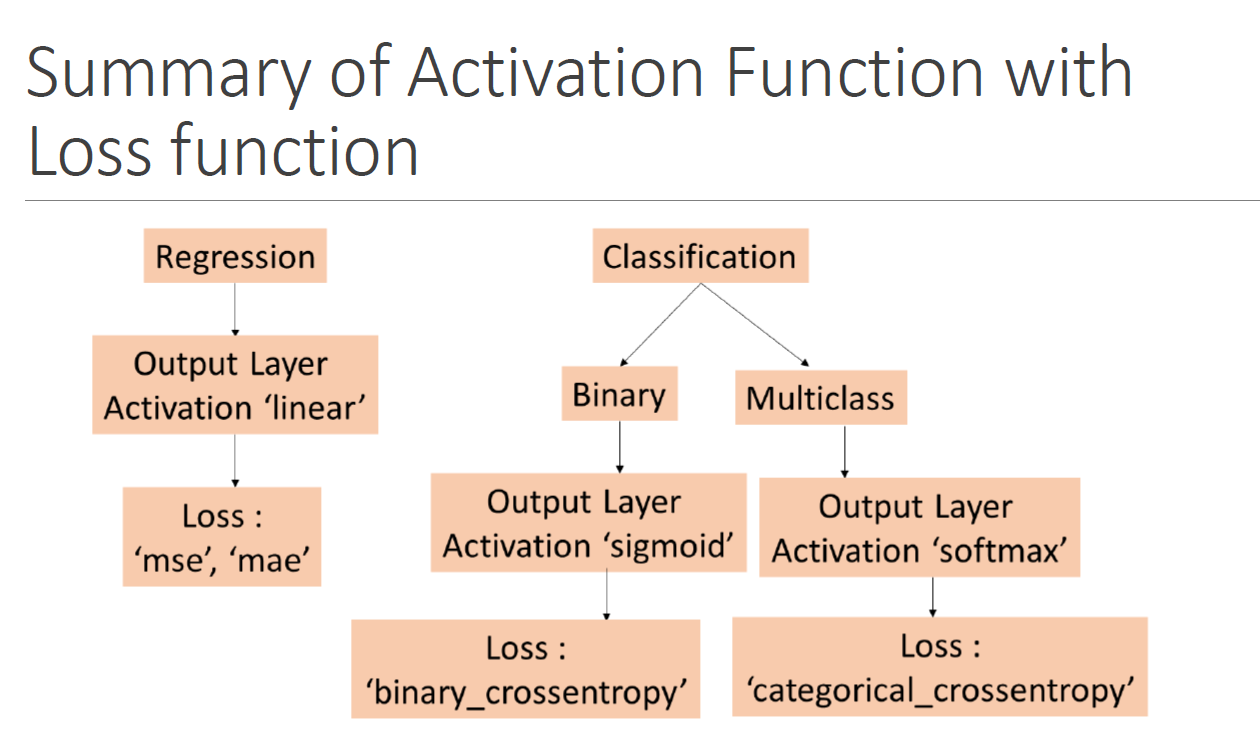

In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
model1 = Sequential()

# Hidden Layer 1
model1.add(Dense(64,activation='relu',input_dim=xtrain.shape[1]))

# Hidden Layer 2
model1.add(Dense(32,activation='relu'))

# Outuput Layer
model1.add(Dense(3,activation='softmax'))


In [19]:
# Model Summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 4163 (16.26 KB)
Trainable params: 4163 (16.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile the model

In [20]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Fit the model

In [21]:
hist1 = model1.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100


120/120 [==============================] - 1s 2ms/step - loss: 0.8875 - accuracy: 0.5865 - val_loss: 0.6943 - val_accuracy: 0.7188
Epoch 2/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6118 - accuracy: 0.7479 - val_loss: 0.5523 - val_accuracy: 0.7698
Epoch 3/100
120/120 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.8102 - val_loss: 0.4793 - val_accuracy: 0.8104
Epoch 4/100
120/120 [==============================] - 0s 1ms/step - loss: 0.4027 - accuracy: 0.8542 - val_loss: 0.4183 - val_accuracy: 0.8375
Epoch 5/100
120/120 [==============================] - 0s 1ms/step - loss: 0.3398 - accuracy: 0.8792 - val_loss: 0.3821 - val_accuracy: 0.8562
Epoch 6/100
120/120 [==============================] - 0s 1ms/step - loss: 0.2909 - accuracy: 0.9070 - val_loss: 0.3555 - val_accuracy: 0.8698
Epoch 7/100
120/120 [==============================] - 0s 1ms/step - loss: 0.2539 - accuracy: 0.9177 - val_loss: 0.3380 - val_accuracy: 0.8813
Epoch 8/100

## Learning Curve 

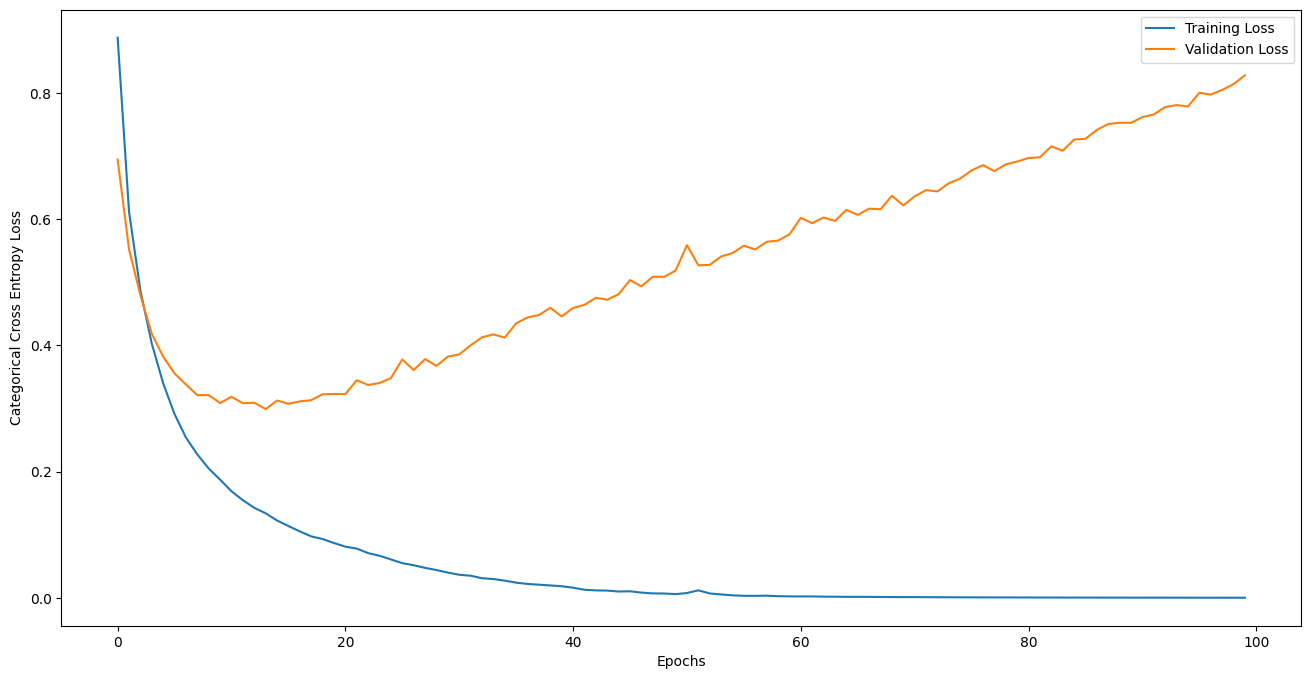

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist1.history['loss'],label='Training Loss')
plt.plot(hist1.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross Entropy Loss')
plt.legend()
plt.show()

In [23]:
# Evaluate training accuracy
model1.evaluate(xtrain,ytrain)

150/150 [==============================] - 0s 731us/step - loss: 0.1657 - accuracy: 0.9781


[0.16566358506679535, 0.9781249761581421]

In [24]:
model1.evaluate(xtest,ytest)

38/38 [==============================] - 0s 860us/step - loss: 0.8766 - accuracy: 0.8817


[0.8766408562660217, 0.8816666603088379]

### Model 2 : Dropout and Batch Normalization

In [25]:
from keras.layers import BatchNormalization, Dropout

In [26]:
model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(64,activation='relu',input_dim=xtrain.shape[1]))
# Batch Normalization 1
model2.add(BatchNormalization())
# Dropout Layer 1
model2.add(Dropout(0.3))

# Hidden Layer 2
model2.add(Dense(32, activation='relu'))
# Batch normalization 2
model2.add(BatchNormalization())
# Dropout Layer 2
model2.add(Dropout(0.2))

# Output Layer
model2.add(Dense(3, activation='softmax'))

In [27]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1984      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 32)               

### Compile model

In [28]:
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Fit the model

In [29]:
hist2 = model2.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100
120/120 [==============================] - 1s 3ms/step - loss: 1.1962 - accuracy: 0.4773 - val_loss: 0.8146 - val_accuracy: 0.6542
Epoch 2/100
120/120 [==============================] - 0s 2ms/step - loss: 0.8907 - accuracy: 0.6023 - val_loss: 0.6928 - val_accuracy: 0.7240
Epoch 3/100
120/120 [==============================] - 0s 2ms/step - loss: 0.7831 - accuracy: 0.6620 - val_loss: 0.6264 - val_accuracy: 0.7469
Epoch 4/100
120/120 [==============================] - 0s 2ms/step - loss: 0.7155 - accuracy: 0.6888 - val_loss: 0.5811 - val_accuracy: 0.7719
Epoch 5/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6728 - accuracy: 0.7227 - val_loss: 0.5460 - val_accuracy: 0.7833
Epoch 6/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6188 - accuracy: 0.7417 - val_loss: 0.5119 - val_accuracy: 0.7958
Epoch 7/100
120/120 [==============================] - 0s 1ms/step - loss: 0.5901 - accuracy: 0.7586 - val_loss: 0.4827 - val_accuracy: 0.8073

### Learning curve

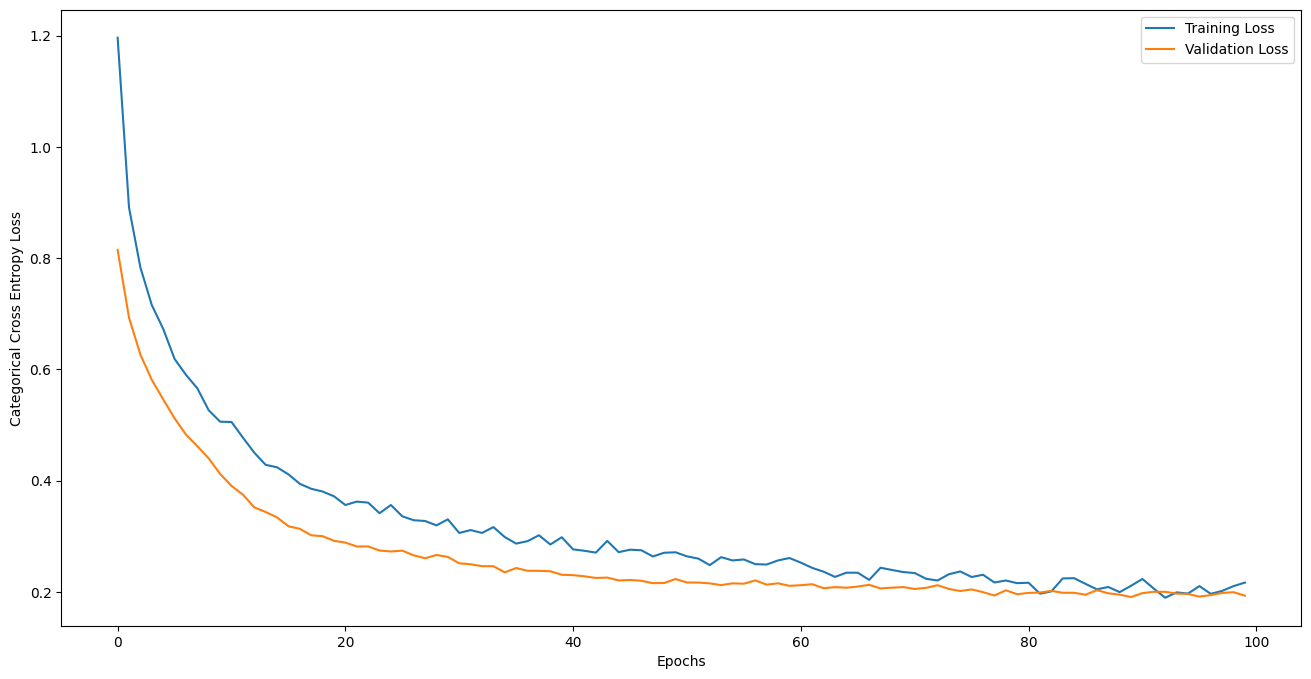

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist2.history['loss'],label='Training Loss')
plt.plot(hist2.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross Entropy Loss')
plt.legend()
plt.show()

## Evaluate the model

In [31]:
# Trainiing
model2.evaluate(xtrain,ytrain)

150/150 [==============================] - 0s 1ms/step - loss: 0.0930 - accuracy: 0.9754


[0.09298360347747803, 0.9754166603088379]

In [32]:
# Testing 
model2.evaluate(xtest,ytest)

38/38 [==============================] - 0s 819us/step - loss: 0.2172 - accuracy: 0.9258


[0.21715815365314484, 0.9258333444595337]

### Predicting Results

In [36]:
yprob_tr = model2.predict(xtrain)
yprob_ts = model2.predict(xtest)

38/38 [==============================] - 0s 727us/step


In [37]:
yprob_tr[0:5]

array([[3.88433342e-04, 6.15909556e-03, 9.93452430e-01],
       [2.48584605e-04, 9.99500513e-01, 2.50893179e-04],
       [1.25324195e-05, 9.99743164e-01, 2.44371156e-04],
       [6.28117286e-03, 9.91845667e-01, 1.87319214e-03],
       [1.43489451e-04, 7.60312905e-05, 9.99780476e-01]], dtype=float32)

In [38]:
yprob_ts[0:5]

array([[8.1349188e-01, 1.9741005e-03, 1.8453394e-01],
       [7.2107852e-01, 4.4183270e-03, 2.7450314e-01],
       [4.7064293e-02, 8.2914100e-04, 9.5210654e-01],
       [1.2684189e-01, 7.9772784e-04, 8.7236041e-01],
       [8.0077207e-01, 2.5283982e-04, 1.9897510e-01]], dtype=float32)

In [39]:
import numpy as np
ypred_tr = np.argmax(yprob_tr,axis=-1)

In [40]:
ypred_tr

array([2, 1, 1, ..., 0, 2, 0], dtype=int64)

In [42]:
ytrain_act = np.argmax(ytrain, axis=-1)
ytrain_act

array([2, 1, 1, ..., 0, 2, 0], dtype=int64)

In [43]:
ypred_ts = np.argmax(yprob_ts,axis=-1)
ypred_ts

array([0, 0, 2, ..., 0, 2, 0], dtype=int64)

In [44]:
ytest

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [45]:
ytest_act = np.argmax(ytest, axis=-1)
ytest_act

array([0, 2, 2, ..., 0, 2, 0], dtype=int64)

# Confusion Matrix testing

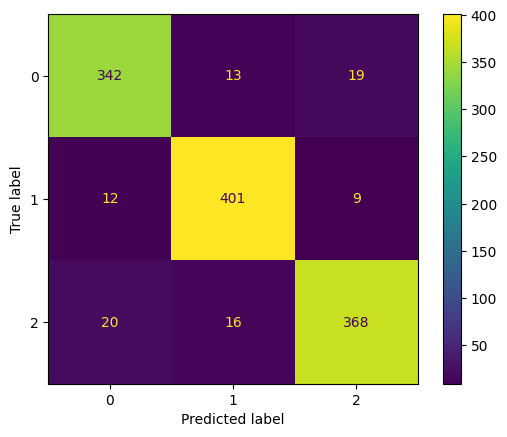

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest_act,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=[0,1,2])
cfd.plot()

### Classificaton Report

In [47]:
from sklearn.metrics import classification_report
print(classification_report(ytest_act,ypred_ts))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       374
           1       0.93      0.95      0.94       422
           2       0.93      0.91      0.92       404

    accuracy                           0.93      1200
   macro avg       0.93      0.93      0.93      1200
weighted avg       0.93      0.93      0.93      1200

